In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#mlt.rcParams['figure.figsize'] = (40.0, 40.0)

In [5]:
titanic_df = pd.read_csv("train.csv")

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# questions
1. who are the people ? (gender wise, Pclasswise, Agewise, Embarked wise etc)
2. Does women and children are significant in surviving?
3. rich people are more likely to survive? (check pclass also embarked and fare)
4. does number of parents-chilren matters? (might be their chances are surviving more)

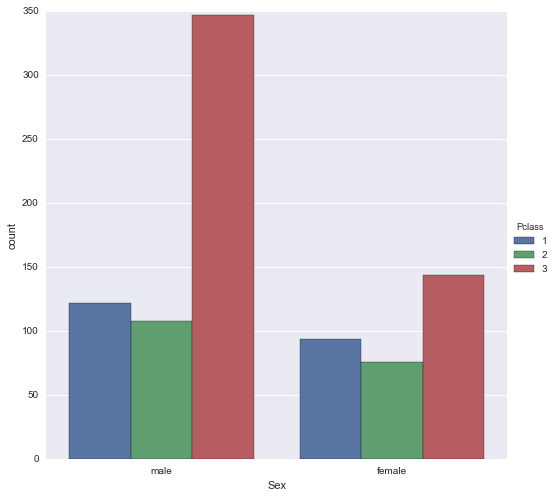

In [8]:
sns.factorplot('Sex',data=titanic_df, kind="count", hue="Pclass",size = 7)

#most of the males are from 3rd class; almost triple than other classes
#females are looking normal

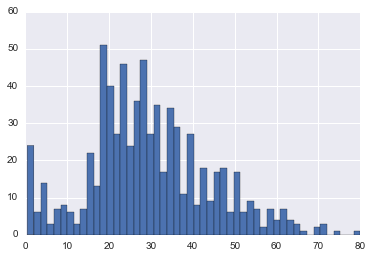

In [9]:
titanic_df['Age'].hist(bins = 50, )

#most of the people are between 16 - 35
#most of the children are less than 1-2 years 

In [10]:
#sns.pairplot()
#titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace = True)
#titanic_df.info()

In [11]:
#sns.pairplot(titanic_df[['Age', 'Sex']])


In [12]:
# now lets treat person who is under 16 as a child

def is_child(person):
    age, sex = person
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(is_child , axis = 1)


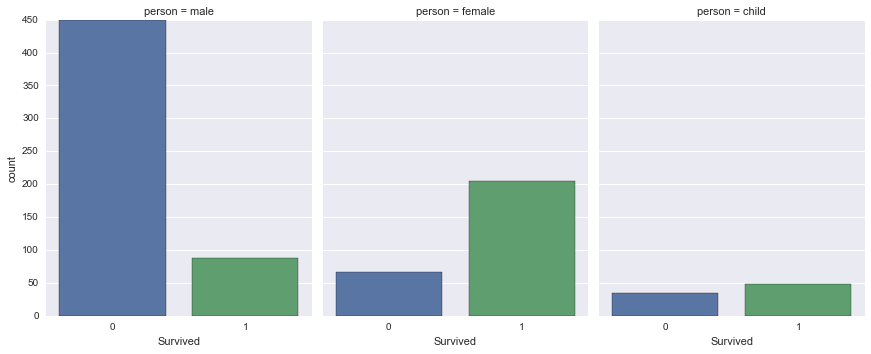

In [20]:
sns.factorplot('Survived', col = 'person', data = titanic_df, kind="count", size=5, aspect=0.8)

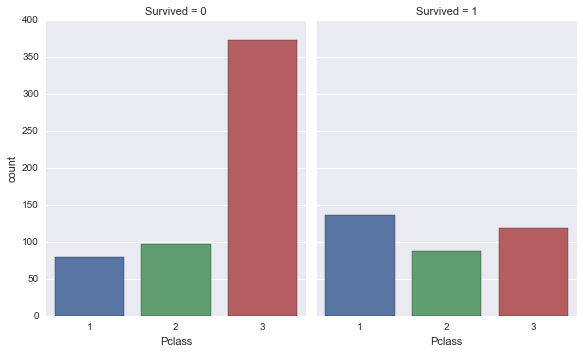

In [14]:
sns.factorplot('Pclass', col = 'Survived', data = titanic_df, kind="count", size=5, aspect=0.8)

In [15]:
titanic_sex =  titanic_df.groupby('Sex')

In [27]:
titanic_sex_norm = titanic_sex['Survived'].value_counts(normalize = True)

In [28]:
titanic_sex_norm.rename('Percentage')

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Percentage, dtype: float64

In [32]:
sex_counts = (titanic_df.groupby(['Sex'])['Survived']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Sex'))

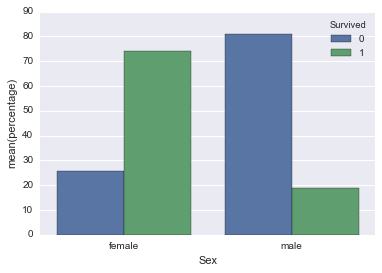

In [33]:
p = sns.barplot(x="Sex", y="percentage", hue="Survived", data=sex_counts)


In [34]:
person_counts = (titanic_df.groupby(['person'])['Survived']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('person'))

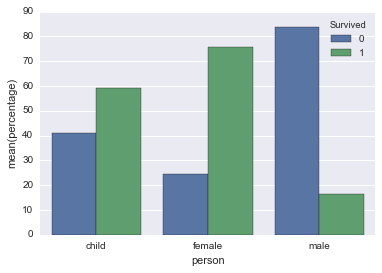

In [35]:
p = sns.barplot(x="person", y="percentage", hue="Survived", data=person_counts)


In [41]:

titanic_df.groupby(['person'])['Survived'].value_counts()

person  Survived
child   1            49
        0            34
female  1           205
        0            66
male    0           449
        1            88
Name: Survived, dtype: int64

In [62]:
titanic_df['person'].value_counts(normalize = True)

male      0.602694
female    0.304153
child     0.093154
Name: person, dtype: float64

In [65]:
titanic_df.groupby('person').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
person,,,,,,,
child,431.602410,0.590361,2.626506,6.369518,1.734940,1.265060,32.785795
female,433.439114,0.756458,2.084871,32.000000,0.601476,0.564576,46.570711
male,454.564246,0.163873,2.372439,33.173123,0.296089,0.152700,24.864182


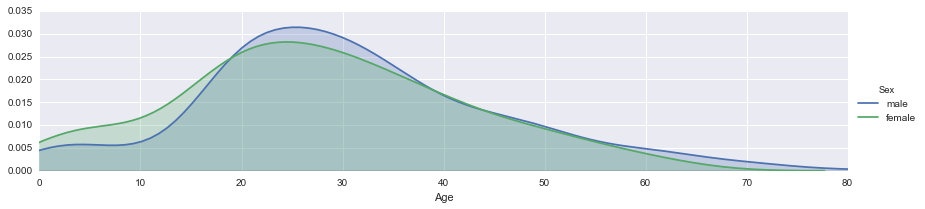

In [87]:
fig = sns.FacetGrid(titanic_df,hue = 'Sex',aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = titanic_df.Age.max()
fig.set(xlim = (0,oldest))
fig.add_legend()

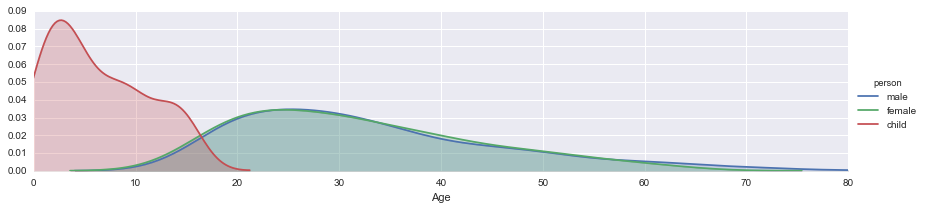

In [90]:
fig = sns.FacetGrid(titanic_df,hue = 'person',aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = titanic_df.Age.max()
fig.set(xlim = (0,oldest))
fig.add_legend()

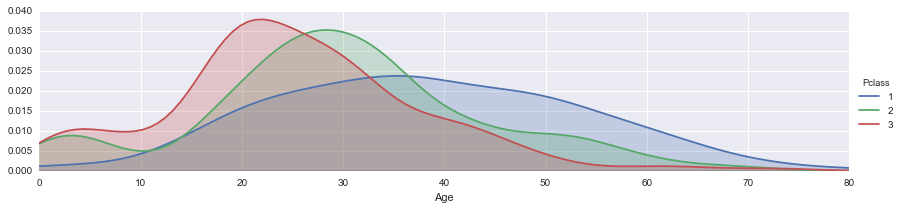

In [93]:
fig = sns.FacetGrid(titanic_df,hue = 'Pclass',aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = titanic_df.Age.max()
fig.set(xlim = (0,oldest))
fig.add_legend()

In [98]:
cabin = titanic_df['Cabin'].dropna()


In [107]:
levels = [level[0] for level in cabin]
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin'] 

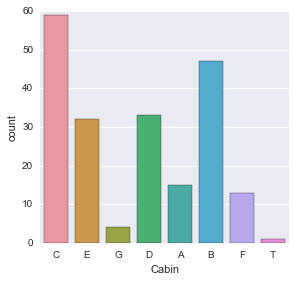

In [109]:
sns.factorplot('Cabin', data = cabin_df, kind = 'count')

In [111]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

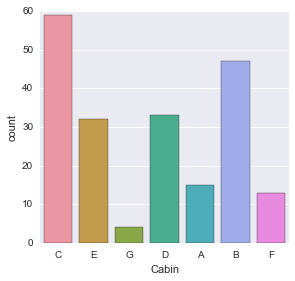

In [112]:
sns.factorplot('Cabin', data = cabin_df, kind = 'count')

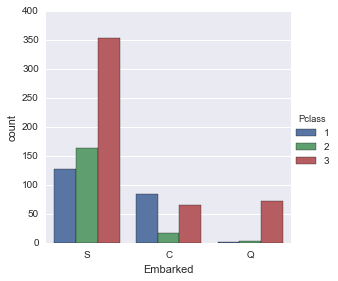

In [114]:
sns.factorplot('Embarked', data=titanic_df,hue = 'Pclass', kind='count')

In [118]:
Alone = titanic_df['Parch'] + titanic_df['SibSp']
titanic_df['Alone'] = Alone

In [123]:
titanic_df['Alone'][titanic_df['Alone'] > 0] = 'with  Family'
titanic_df['Alone'][titanic_df['Alone'] == 0] = 'Alone'

/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


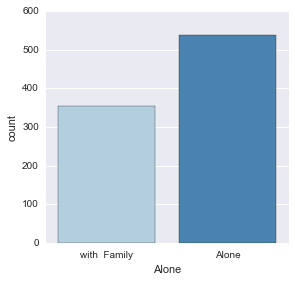

In [127]:
sns.factorplot('Alone', data = titanic_df, kind='count', palette='Blues')

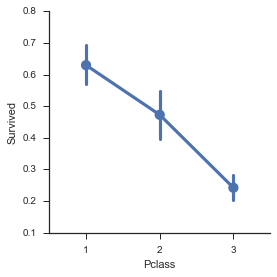

In [140]:

sns.factorplot('Pclass','Survived',data = titanic_df)

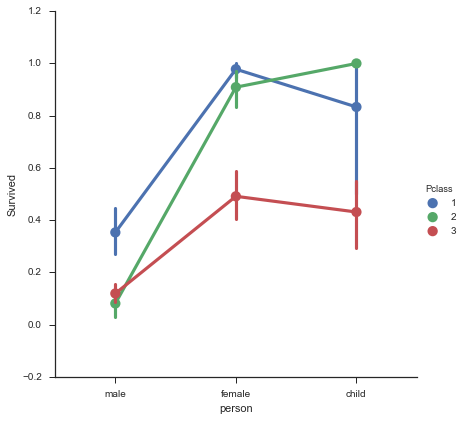

In [145]:
sns.factorplot('person','Survived',hue = 'Pclass',data=titanic_df, size = 6)

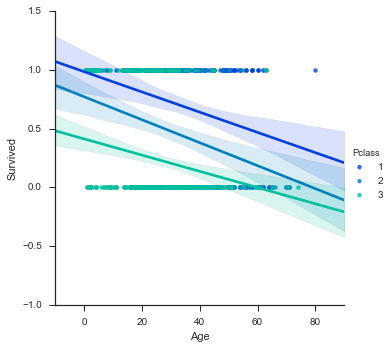

In [150]:
sns.lmplot('Age', 'Survived',hue = 'Pclass', data=titanic_df, palette='winter')

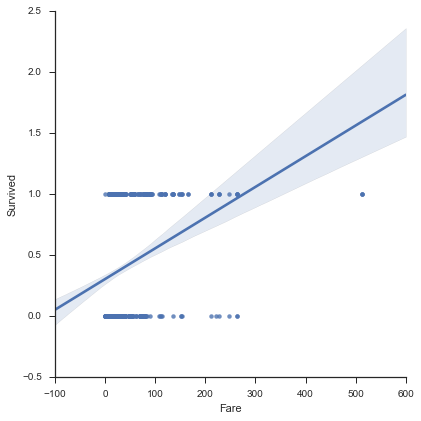

In [154]:
sns.lmplot('Fare', 'Survived', data=titanic_df, palette='winter',size=6)

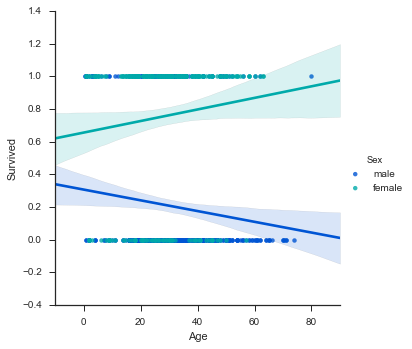

In [155]:
sns.lmplot('Age', 'Survived',hue = 'Sex', data=titanic_df, palette='winter')